# Zadanie rekrutacyjne 2022

### Student performance classification

Zbiór danych zawiera informacje na temat demograficznej, socjalnej i związanej ze szkolną sytuacją około 400 uczniów dwóch portugalskich szkół średnich.

[Zbiór danych](https://www.kaggle.com/datasets/whenamancodes/student-performance)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Portuguese.csv', sep=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11
649,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11


In [3]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
y = data['G3']
X = data.drop(['G1', 'G2', 'G3'], axis=1)

## Test data

In [5]:
test = pd.read_csv('Maths.csv', sep=';')
y_test = test['G3']
X_test = test.drop(['G1', 'G2', 'G3'], axis=1)

## Budowa pipelineu

In [6]:
binary_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
                   'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
categorical_features = ['Mjob', 'Fjob', 'reason', 'guardian']
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                      'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

preprocessor = ColumnTransformer([
    ('bin', OneHotEncoder(drop='if_binary'), binary_features),
    ('cat', OneHotEncoder(), categorical_features),
    ('num', MinMaxScaler(), numerical_features)
])

In [7]:
X = preprocessor.fit_transform(X)
y = y.apply(lambda x: 1 if x>10 else 0)

In [8]:
X_test = preprocessor.transform(X_test)
y_test = y_test.apply(lambda x: 1 if x>10 else 0)

## Models

### Decision Tree

In [12]:
clf1 = DecisionTreeClassifier(max_depth=15)
clf1.fit(X, y)
clf1.score(X, y)

1.0

### Random Forest

In [19]:
clf2 = RandomForestClassifier(max_depth=12, random_state=1234)
clf2.fit(X, y)
clf2.score(X, y)

0.9938556067588326

### Performance on test data

In [20]:
print(clf1.score(X_test, y_test))
print(clf2.score(X_test, y_test))

0.6246851385390428
0.6322418136020151


## Depth impact

In [26]:
tree_acc = []
tree_test_acc = []
forest_acc = []
forest_test_acc = []

for depth in range(5, 20):
    clf1 = DecisionTreeClassifier(max_depth=depth)
    clf1.fit(X, y)
    tree_acc.append(clf1.score(X, y))
    tree_test_acc.append(clf1.score(X_test, y_test))
    
    clf2 = RandomForestClassifier(max_depth=depth, random_state=1234)
    clf2.fit(X, y)
    forest_acc.append(clf2.score(X, y))
    forest_test_acc.append(clf2.score(X_test, y_test))

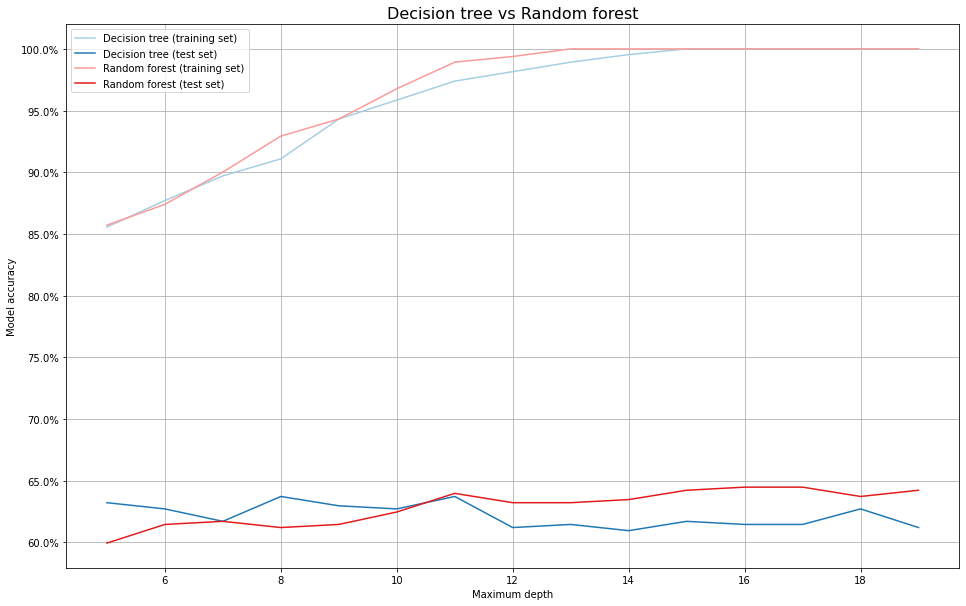

In [56]:
fig, ax = plt.subplots(figsize=(16,10))
cmap = cm.get_cmap('Paired')

p1, = ax.plot(range(5, 20), tree_acc, color=cmap(0), label='Decision tree (training set)')
p2, = ax.plot(range(5, 20), tree_test_acc, color=cmap(1), label='Decision tree (test set)')

p3, = ax.plot(range(5, 20), forest_acc, color=cmap(4), label='Random forest (training set)')
p4, = ax.plot(range(5, 20), forest_test_acc, color=cmap(5), label='Random forest (test set)')

ax.legend(handles=[p1, p2, p3, p4])
ax.grid()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Maximum depth')
ax.set_ylabel('Model accuracy')
ax.set_title('Decision tree vs Random forest', fontsize=16)

plt.show()